## Logistic回归

### 优点：计算代价不高，易于理解和实现

### 缺点：容易欠拟合，分类精度可能不高

### 适用数据类型：数值型和标称型数据

### logistic回归的一般过程

1.收集数据：采用任意方法收集数据。

2.准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳。

3.分析数据：采用任意方法对数据进行分析。

4.训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数。

5.测试算法：一旦训练步骤完成，分类将会很快。

6.使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判断它们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。


## 5.1 基于最优化方法的最佳回归系数确定


### 5.1.1 训练算法：使用梯度上升找到最佳参数

伪代码：

    每个回归系数初始化为1
   
       计算整个数据集的梯度
   
       使用alpha * gradient 更新回归系数的向量

    返回回归系数

创建logRegres.py文件，添加代码5-1.

In [4]:
import logRegres - 
dataArr,labelMat = logRegres.loadDataSet()

In [9]:
reload(logRegres)
logRegres.gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.1.2 分析数据：画出决策边界

画出数据集和Logistic回归最佳拟合直线的函数：

添加代码：5-2

In [19]:
import logRegres
reload(logRegres)

<module 'logRegres' from 'logRegres.py'>

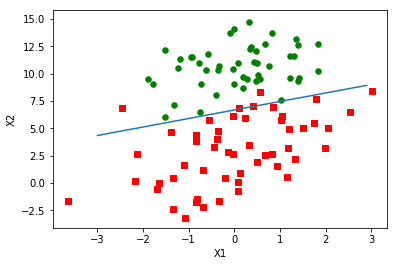

In [21]:
dataMat,labelMat = logRegres.loadDataSet()
weights = logRegres.gradAscent(dataMat,labelMat)
logRegres.plotBestFit(weights.getA())

梯度上升算法在500次迭代后得到的Logistic回归最佳拟合直线

In [11]:
weights.getA()

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

In [12]:
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])


### 5.1.3 训练算法：随机梯度上升

梯度上升算法在每次更新回归系数时都需要遍历整个数据集。如果样本和特征量过大，那么该方法的计算复杂度就太高了。

一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为随机梯度上升算法。

由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。

随机梯度上升算法伪代码：

    所有回归系数初始化为1

    对数据集中每个样本：
    
        计算该样本的梯度
        使用alpha*gradient更行回归系数值
        
    返回回归系数值

添加代码5-3

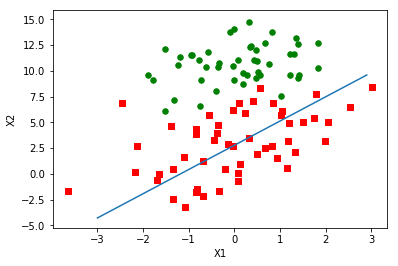

In [57]:
reload(logRegres)
from numpy import * 
dataArr,labelMat = logRegres.loadDataSet()
weights = logRegres.stocGradAscent0(array(dataArr),labelMat)
logRegres.plotBestFit(weights)

判断一个算法优劣的可靠方法是看它是否收敛。也就是说参数是否达到了稳定值。

我们发现在现在的随机梯度上升算法迭代过程中，X0,X1,X2的收敛速度有很大差别，而且在大的波动停止后，还有一些小的周期性波动。产生这种现象的原因是存在一些不能正确分类的样本点，在每次迭代时会引发系数的剧烈改变。

我们期望算法能过避免来回波动，从而收敛到某个值。另外，收敛速度也需要加快。

#### 我们可以通过修改代码5-3的随机梯度上升算法来解决。

添加代码：5-4

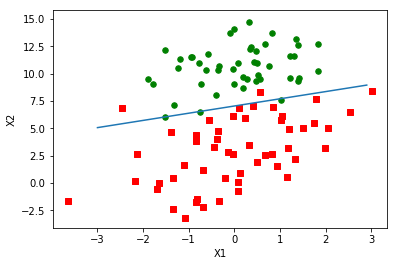

In [8]:
import logRegres
reload(logRegres)
from numpy import *
dataMatrix , labelMat = logRegres.loadDataSet()
weights = logRegres.stocGradAscent1(array(dataMatrix), labelMat)
logRegres.plotBestFit(weights)

运行之后发现，该分隔线达到来与gradAscent()差不多的效果，但是所使用的计算量更少。

默认迭代次数是150，可以通过stocGradAscent1()的第三个参数来进行修改。
    
    weights = logRegres.stocGradAscent1(array(dataMatrix),labelMat,500)


## 5.2 示例：从疝气病症预测病马的死亡率

    1.收集数据：给定数据文件。
    2.准备数据：用python解析文本文件并填充缺失值。
    3.分析数据：可视化并观察数据。
    4.训练算法：使用优化的算法，找到最佳的系数。
    5.测试算法：为了量化回归的结果，需要观察错误率。根据错误率决定是否退到训练阶段，
            通过改变迭代的次数和步长等参数来得到更好的回归系数。
    6.使用算法：使用简单的命令行程序来收集马的症状并输出预测结果。

### 5.2.1 准备数据：处理数据中的缺失值

数据中的缺失值是个非常棘手的问题。所以必须采用一些方法来解决这个问题。
      
      @使用可用的特征的均值来填补缺失值；
      @使用特殊值来填补缺失值，如-1；
      @忽略有缺失值的样本；
      @使用相似样本的均值填补缺失值；
      @使用另外的机器学习算法预测缺失值；
      
1.所有的缺失值必须用一个实数值来替换，因为我们使用的NumPy数据类型不允许包含缺失值。这里选择实数0来替换所有的缺失值。恰好能使用与Logistic回归。这是因为回归系数的更新公式如下：

    weights = weights + alpha * error * dataMatrix[randIndex]    
如果dataMatrix的某特征对应值为0，那么该特征的系数将不做更新。

2.如果在测试数据集中发现了一条数据集的类别标签已经缺失，那么我们的简单做法是将该条数据丢弃。因为类别标签与特征不同，很难确定采用某个合适的值来替换。采用logistic回归进行分类时这种做法是合理的，而如果采用类似KNN的方法就可能不太可行。

### 5.2.2 测试算法：用Logistic回归进行分类

添加代码5-5

In [11]:
reload(logRegres)
logRegres.multiTest()

logRegres.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+exp(-inX))


the error rata of this test is : 0.447761
the error rata of this test is : 0.268657
the error rata of this test is : 0.268657
the error rata of this test is : 0.298507
the error rata of this test is : 0.313433
the error rata of this test is : 0.373134
the error rata of this test is : 0.298507
the error rata of this test is : 0.313433
the error rata of this test is : 0.298507
the error rata of this test is : 0.328358
after 10 iterations the average error rate is : 0.320896 
